In [1]:
! pip install matplotlib
! pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
agua = pd.read_csv('C:/Users/User/Documents/ESP. BIG DATA Y ANALISIS/Matematica_Big_Data/Calidad_del_Agua_para_Consumo_Humano_en_Colombia_20250613.csv')
agua.head()

DepartamentoCodigo Departamento MunicipioCodigo Municipio   Año  IRCA  \
0                  70        Sucre           70235   Galeras  2017  53.0   
1                  70        Sucre           70235   Galeras  2018  12.0   
2                  70        Sucre           70235   Galeras  2019  18.8   
3                  70        Sucre           70235   Galeras  2020  50.0   
4                  70        Sucre           70235   Galeras  2021  13.1   

  Nivel de riesgo IRCAurbano Nivel de riesgo urbano IRCArural  \
0     Riesgo alto       48.5            Riesgo alto        ND   
1     Riesgo bajo       12.0            Riesgo bajo        ND   
2    Riesgo medio         ND                     ND        ND   
3     Riesgo alto       50.0            Riesgo alto        ND   
4     Riesgo bajo       13.1            Riesgo bajo        ND   

  Nivel de riesgo rural  
0                    ND  
1                    ND  
2                    ND  
3                    ND  
4                    ND

In [4]:
agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19160 entries, 0 to 19159
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DepartamentoCodigo      19160 non-null  int64  
 1   Departamento            19160 non-null  object 
 2   MunicipioCodigo         19160 non-null  object 
 3   Municipio               19160 non-null  object 
 4   Año                     19160 non-null  int64  
 5   IRCA                    19160 non-null  float64
 6   Nivel de riesgo         19160 non-null  object 
 7   IRCAurbano              19160 non-null  object 
 8   Nivel de riesgo urbano  19160 non-null  object 
 9   IRCArural               19160 non-null  object 
 10  Nivel de riesgo rural   19160 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.6+ MB


In [5]:
agua['MunicipioCodigo'].astype(str).value_counts().get('#TODOS', 0)
# Debido a que hay 569 registros con el valor #TODOS, se eliminará la columna 'MunicipioCodigo' para evitar problemas en el análisis posterior.
agua = agua.drop(columns=['MunicipioCodigo', 'DepartamentoCodigo'])

In [6]:
# Convertir la columna 'Año' a tipo fecha
agua['Año'] = pd.to_datetime(agua['Año'], format='%Y')


ANALISIS INICIAL: La base principal para determinar la calidad del agua para el consumo humano se basa en determinar el IRCA que es el indice de Riesgo de Calidad del Agua, el cual mide el nivel en el que se encuentra la misma siendo 0 totalmente optima y 100 totalmente riesgosa. 

C:\Users\User\AppData\Local\Temp\ipykernel_5736\3175672801.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=agua, x='Año', y= 'IRCA' , palette='viridis')


<Axes: xlabel='Año', ylabel='IRCA'>

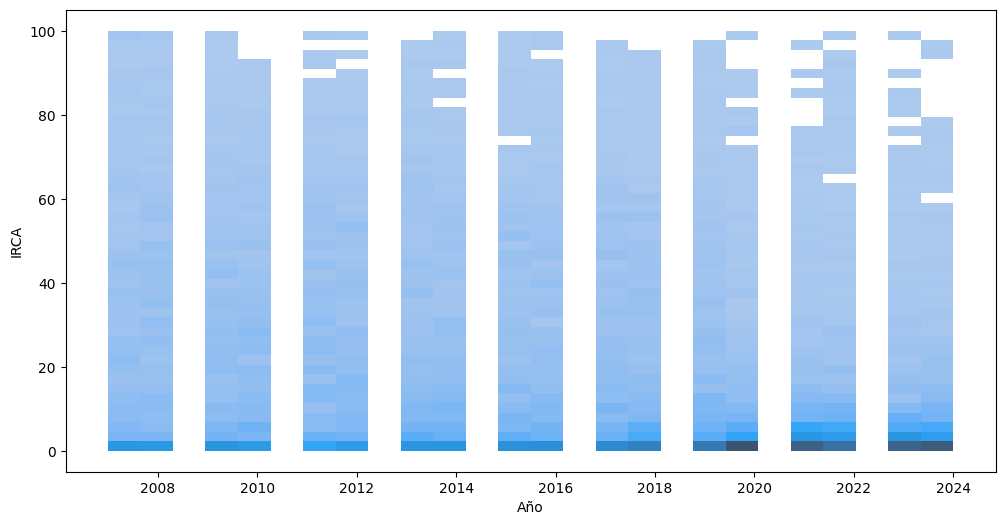

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data=agua, x='Año', y= 'IRCA' , palette='viridis')

C:\Users\User\AppData\Local\Temp\ipykernel_5736\1645739756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=agua, x='Departamento', y='IRCA', palette='viridis')


Text(0.5, 1.0, 'IRCA de Calidad del Agua por Departamento')

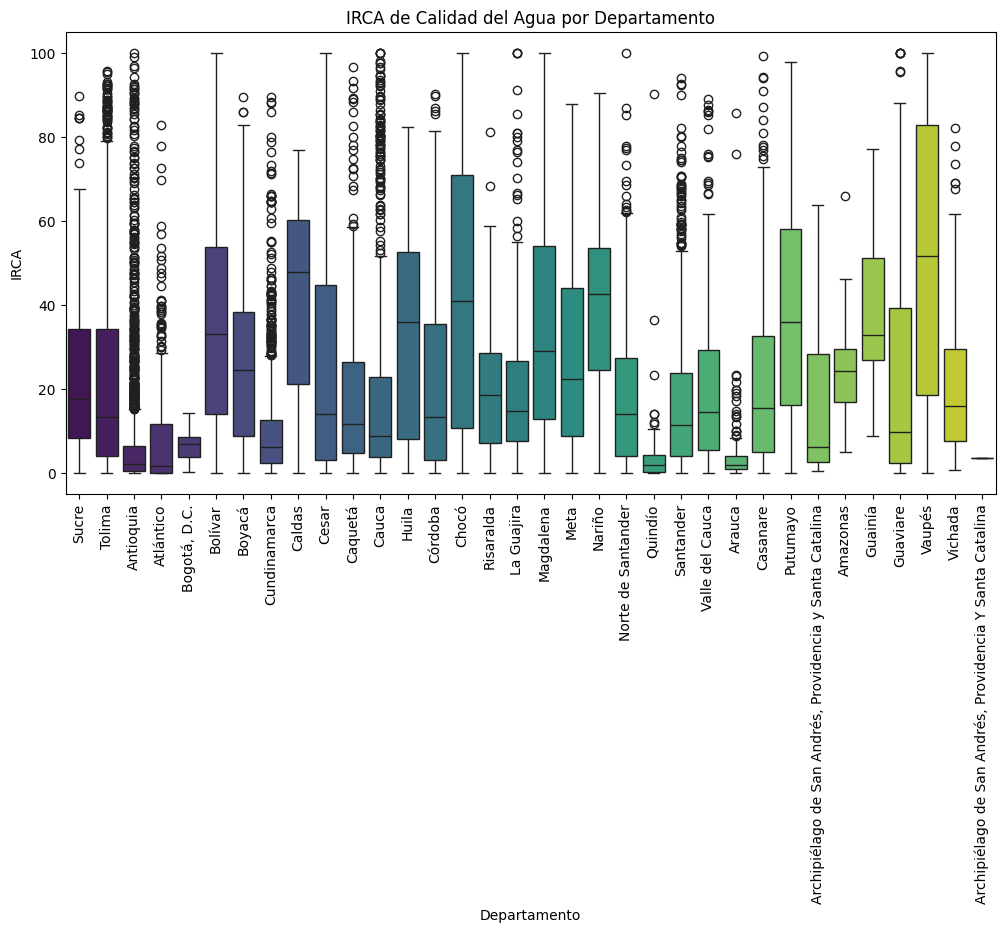

In [8]:
# IRCA de calidad del agua por departamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=agua, x='Departamento', y='IRCA', palette='viridis')  
plt.xticks(rotation=90)
plt.title('IRCA de Calidad del Agua por Departamento')


In [9]:
agua['IRCAurbano'].value_counts()
agua['IRCAurbano'] = pd.to_numeric(agua['IRCAurbano'], errors='coerce')
agua['IRCArural'].value_counts()
agua['IRCArural'] = pd.to_numeric(agua['IRCArural'], errors='coerce')
print(agua['IRCAurbano'].isnull().sum())
print(agua['IRCArural'].isnull().sum())
print(agua['IRCAurbano'].notnull().sum())
print(agua['IRCArural'].notnull().sum())

1268
9615
17892
9545


In [10]:
# Reemplazar los datos nulos en IRCAurbano y IRCArural por la mediana según Municipio y Año
# Para IRCAurbano
agua['IRCAurbano'] = agua.groupby(['Municipio', 'Año'])['IRCAurbano'].transform(
    lambda x: x.fillna(x.median())
)
# Para IRCArural
agua['IRCArural'] = agua.groupby(['Municipio', 'Año'])['IRCArural'].transform(
    lambda x: x.fillna(x.median())
)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

In [11]:
print("IRCAurbano - Nulos:", agua['IRCAurbano'].isnull().sum())
print("IRCAurbano - No nulos:", agua['IRCAurbano'].notnull().sum())
print("IRCArural - Nulos:", agua['IRCArural'].isnull().sum())
print("IRCArural - No nulos:", agua['IRCArural'].notnull().sum())

IRCAurbano - Nulos: 1116
IRCAurbano - No nulos: 18044
IRCArural - Nulos: 8840
IRCArural - No nulos: 10320


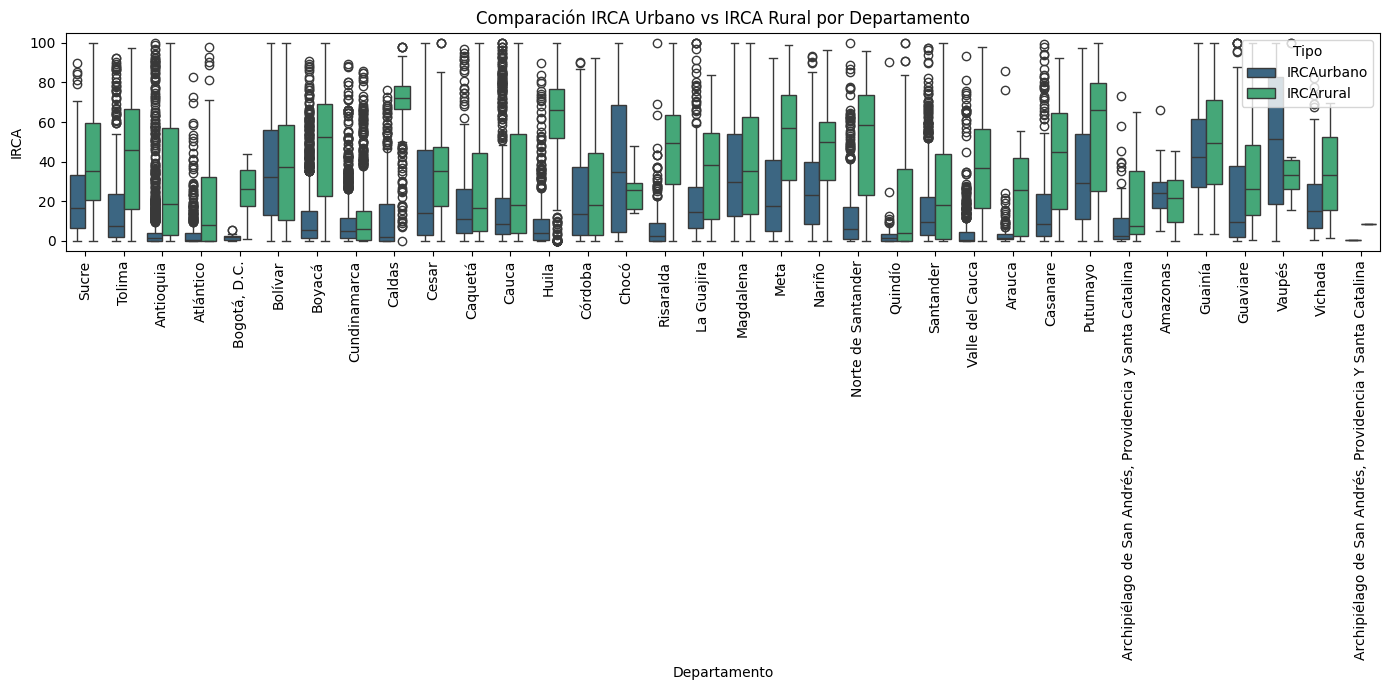

In [12]:
agua_melt = agua.melt(
    id_vars=['Departamento'],
    value_vars=['IRCAurbano', 'IRCArural'],
    var_name='Tipo',
    value_name='Valor'
)

plt.figure(figsize=(14, 7))
sns.boxplot(data=agua_melt, x='Departamento', y='Valor', hue='Tipo', palette='viridis')
plt.xticks(rotation=90)
plt.title('Comparación IRCA Urbano vs IRCA Rural por Departamento')
plt.ylabel('IRCA')
plt.xlabel('Departamento')
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()

In [13]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
#agua.to_csv('C:/Users/User/Documents/ESP. BIG DATA Y ANALISIS/Matematica_Big_Data/Calidad_del_Agua_Modificado.csv', index=False)

In [14]:
# Contar los valores nulos de las columnas 'IRCAurbano' e 'IRCArural'
print("Valores nulos en IRCAurbano:", agua['IRCAurbano'].isnull().sum())
print("Valores nulos en IRCArural:", agua['IRCArural'].isnull().sum())

Valores nulos en IRCAurbano: 1116
Valores nulos en IRCArural: 8840


In [15]:
agua['IRCAurbano'] = pd.to_numeric(agua['IRCAurbano'], errors='coerce')
agua['IRCArural'] = pd.to_numeric(agua['IRCArural'], errors='coerce')

agua['IRCAurbano'] = agua.groupby(['Municipio', 'Año'])['IRCAurbano'].transform(
    lambda x: x.fillna(x.median())
)
agua['IRCArural'] = agua.groupby(['Municipio', 'Año'])['IRCArural'].transform(
    lambda x: x.fillna(x.median())
)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

In [16]:
def fill_irca_based_on_previous(agua, col_name):
    for idx, row in agua[agua[col_name].isnull()].iterrows():
        municipio = row['Municipio']
        año = row['Año']
        # Filtra años anteriores con datos no nulos en la columna
        prev = agua[(agua['Municipio'] == municipio) & (agua['Año'] < año) & (agua[col_name].notnull())]
        if not prev.empty:
            agua.at[idx, col_name] = row['IRCA']
    return agua

agua = fill_irca_based_on_previous(agua, 'IRCAurbano')
agua = fill_irca_based_on_previous(agua, 'IRCArural')

In [17]:
print("Valores nulos en IRCAurbano:", agua['IRCAurbano'].isnull().sum())
print("Valores nulos en IRCArural:", agua['IRCArural'].isnull().sum())

Valores nulos en IRCAurbano: 466
Valores nulos en IRCArural: 3950


In [18]:
# Mostrar filas donde IRCAurbano o IRCArural siguen siendo nulos
nulos_restantes = agua[agua['IRCAurbano'].isnull() | agua['IRCArural'].isnull()]
print(nulos_restantes)

      Departamento     Municipio        Año  IRCA Nivel de riesgo  IRCAurbano  \
7            Sucre      Guaranda 2007-01-01  54.8     Riesgo alto        54.8   
8            Sucre      Guaranda 2008-01-01  36.8     Riesgo alto        36.8   
9            Sucre      Guaranda 2009-01-01  41.0     Riesgo alto        41.0   
10           Sucre      Guaranda 2010-01-01  39.2     Riesgo alto        39.2   
11          Tolima     Rioblanco 2010-01-01   2.6      Sin riesgo         NaN   
...            ...           ...        ...   ...             ...         ...   
19134    Antioquia       Yolombó 2024-01-01   0.4      Sin riesgo         0.4   
19152    Atlántico  Sabanagrande 2024-01-01   0.0      Sin riesgo         0.0   
19155    Atlántico   Santo Tomás 2024-01-01   0.0      Sin riesgo         0.0   
19157    Atlántico          Suan 2024-01-01   0.0      Sin riesgo         0.0   
19159    Atlántico      Usiacurí 2024-01-01   0.0      Sin riesgo         0.0   

      Nivel de riesgo urban

In [26]:
agua['IRCAurbano'] = agua['IRCAurbano'].fillna(0)
agua['IRCArural'] = agua['IRCArural'].fillna(0)

In [27]:
agua.to_excel('C:\\Users\\User\\Documents\\docs\\ANALISIS DE DATOS\\PORTFOLIO\\agua.xlsx')

In [28]:
agua.isnull().sum()

Departamento              0
Municipio                 0
Año                       0
IRCA                      0
Nivel de riesgo           0
IRCAurbano                0
Nivel de riesgo urbano    0
IRCArural                 0
Nivel de riesgo rural     0
dtype: int64